In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [19]:
# define state schema
class BMIInput(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str


In [11]:
# define function to calculate BMI
def calculate_bmi(state: BMIInput) -> BMIInput:
    weight = state["weight_kg"]
    height = state["height_m"]
    bmi = weight / (height ** 2)
    state["bmi"] = round(bmi, 2)
    return state

In [20]:
def categorize_bmi(state: BMIInput) -> BMIInput:
    bmi = state["bmi"]
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    state["category"] = category
    return state

In [21]:
# define your graph
graph = StateGraph(BMIInput)

# add node to graph
graph.add_node(calculate_bmi, calculate_bmi)
graph.add_node(categorize_bmi, categorize_bmi)

# add edges to graph
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "categorize_bmi")
graph.add_edge("categorize_bmi", END)

# compile the graph
workflow = graph.compile()



In [22]:
# excute the workflow
Initial_State = {'weight_kg': 70, 'height_m': 1.75}

final_state = workflow.invoke(Initial_State)

print(final_state)  # Output will include the calculated BMI

{'weight_kg': 70, 'height_m': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}


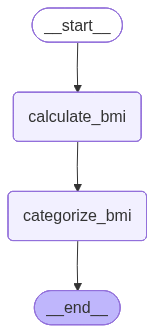

In [23]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())
